In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

#Charon
import sys
# sys.path.append("/data/user/niovine/software/charon/charon")
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from NuSignal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


NameError: name 'PC' is not defined

In [2]:
# cut to low values
def cutspectra(spec, cut):
    for flv in ["nu_e", "nu_mu", "nu_tau"]:
        for i, val in enumerate(spec[flv]["dNdE"]):
            if val<cut:
                spec[flv]["dNdE"][i] = 0
    return spec


Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
{'nu_e': {'E': array([ 1.        ,  1.65517241,  2.31034483,  2.96551724,  3.62068966,
        4.27586207,  4.93103448,  5.5862069 ,  6.24137931,  6.89655172,
        7.55172414,  8.20689655,  8.86206897,  9.51724138, 10.17241379,
       10.82758621, 11.48275862, 12.13793103, 12.79310345, 13.44827586,
       14.10344828, 14.75862069, 15.4137931 , 16.06896552, 16.72413793,
       17.37931034, 18.03448276, 18.68965517, 19.34482759, 20.        ]), 'dNdE': array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 

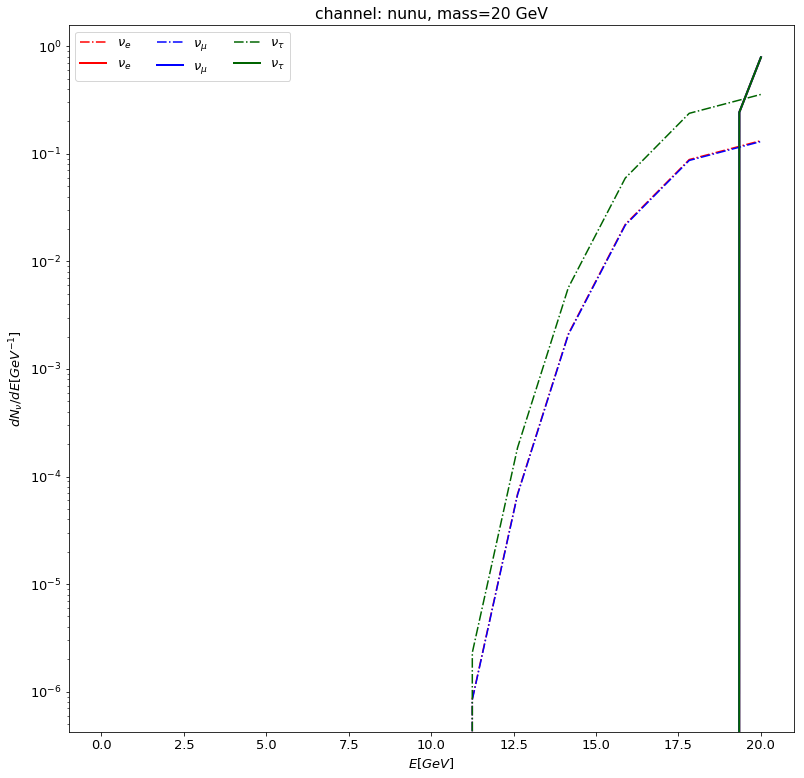

In [5]:
# Create NuRate object:
mass=20
channel="nunu"
process="ann"
Rate = NuRate(mass, channel, process)
Rate.nodes=100
Rate.bins=30
# Rate.logscale=True

# Rate.interactions=True
# Compute Rate
PPPC4 = Rate.NuRatePPPC4_AvgOsc()
Charon = Rate.NuRateCharon_nuSQUIDS()
# print(Charon)
if mass<50 and channel =="nunu":
    Charon = cutspectra(Charon, 1e-5)
print(Charon)    
# print(PPPC4)
# style and color for plots:
labels={"nu_e":r"$\nu_e$", "nu_mu":r"$\nu_\mu$", "nu_tau":r"$\nu_\tau$"}
colors={"nu_e":"red","nu_mu":"blue", "nu_tau":"darkgreen" }
for flv in ["nu_e", "nu_mu", "nu_tau"]:
    plt.plot(PPPC4[flv]["E"], PPPC4[flv]["dNdE"], linestyle="-.", color=colors[flv], label=labels[flv])
    plt.plot(Charon[flv]["E"], Charon[flv]["dNdE"], linewidth=2, linestyle="-", marker="", color=colors[flv], label=labels[flv])
plt.semilogy()
# plt.semilogx()
plt.xlabel(r"$E [GeV]$")
plt.ylabel(r"$dN_\nu/dE [GeV^{-1}]$")
plt.title("channel: {}, mass={} GeV".format(channel, mass))
plt.legend(ncol=3)

Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/SpectraEW.hdf5
Initial Flux

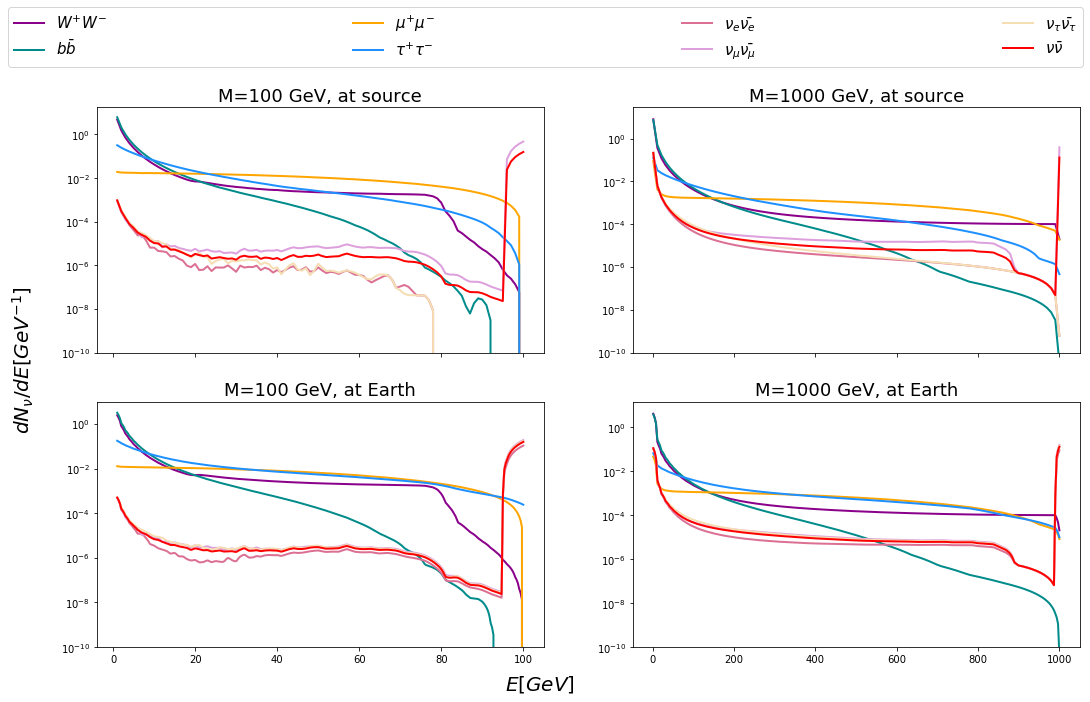

In [13]:
# channels and masses show in the plots:
channels = ["WW", "bb", "mumu", "tautau", "nuenue","numunumu","nutaunutau", "nunu"]
# channels = ["numunumu"]
mass = [100, 1000]
nu_type =  'nu_mu' #'nu_e' #'nu_tau' #nu_e_bar' #'nu_mu_bar' #'nu_tau_bar' #'nu_tau' #'nu_mu' #

colors = {"WW":"darkmagenta","tautau":"dodgerblue","mumu":"orange","bb":"darkcyan","nuenue":"palevioletred","numunumu":"plum","nutaunutau":"wheat", "nunu":"red"}
legends = {"WW":r"$W^{+}W^{-}$","tautau":r"$\tau^{+}\tau^{-}$","mumu":r"$\mu^{+}\mu^{-}$","bb":r"$b\bar{b}$","nuenue":r"$\nu_e\bar{\nu_e}$","numunumu":r"$\nu_\mu\bar{\nu_\mu}$","nutaunutau":r"$\nu_\tau\bar{\nu_\tau}$", "nunu":r"$\nu \bar{\nu}$"}
labels_nutype = {'nu_e':r"$\nu_{e}$",'nu_mu':r"$\nu_{\mu}$",'nu_tau':r"$\nu_{\tau}$",'nu_e_bar':r"$\bar{\nu}_{e}$",'nu_mu_bar':r"$\bar{\nu}_{\mu}$",'nu_tau_bar':r"$\bar{\nu}_{\tau}$"}

flux_Source_ann=dict()
flux_Earth_ann=dict()
for ch in channels:
    flux_Source_ann[ch]=dict()
    flux_Earth_ann[ch]=dict()
    Rate.channel=ch
    for m in mass:
        Rate.mass=m
        Rate.Emax=m
        flux_Source_ann[ch][str(m)] = Rate.NuRateCharon()
        flux_Earth_ann[ch][str(m)] = Rate.NuRateCharon_nuSQUIDS()


flux_ann = [flux_Source_ann, flux_Earth_ann]

# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    
plt.rcParams['figure.figsize'] = [15, 10]
fig, axs = plt.subplots(2, 2, sharex='col')

# Spectra:
for i in range(0, len(mass)): # 2 mass: 100 (left), 1000 (right)
    for j in range(0, len(flux_ann)): # at Source (upper), at Earth (lower)
        for channel in channels:
            E = flux_ann[j][channel][str(mass[i])][nu_type]["E"]
            flux = flux_ann[j][channel][str(mass[i])][nu_type]["dNdE"]
            axs[j,i].plot(E,flux,linewidth=2.0,label=legends[channel],color=colors[channel])
        # Make nunubar flux as average of three nunubar channel:
#         flux_nunubar = (flux_ann[j]["nuenue"][str(mass[i])][nu_type]["dNdE"] + flux_ann[j]["numunumu"][str(mass[i])][nu_type]["dNdE"] + flux_ann[j]["nutaunutau"][str(mass[i])][nu_type]["dNdE"])/3.
#         axs[j,i].plot(E,flux_nunubar,linewidth=2.0,label=r"$\nu \bar{\nu}$",color="red", marker = 'o')
#         axs[j,i].xlim(0,masses[i]+10)
        axs[j,i].semilogy()
#         axs[j,i].semilogx()
        axs[j,i].set_ylim(1e-10)
        axs[j,i].set_title("M={} GeV, at {}".format(str(mass[i]), "source" if (j==0) else "Earth" ), fontsize=18)

# fig.xlabel(r"$E [GeV]$")
# fig.ylabel(r"$dN_\nu/dE [GeV^{-1}]$")
fig.text(0.5, 0.04, r"$E [GeV]$", ha='center', fontsize=20)
fig.text(0.01, 0.5, r"$dN_\nu/dE [GeV^{-1}]$", va='center', rotation='vertical', fontsize=20)
# fig.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=5)

lines, labels = fig.axes[-1].get_legend_handles_labels()   
fig.legend(lines, labels, loc = "upper center", ncol=4, mode='expand', fontsize=15)
# fig.tight_layout()
plt.subplots_adjust(left=0.09,
                    bottom=0.1, 
                    right=1., 
                    top=0.85, 
                    wspace=0.2, 
                    hspace=0.2)
plt.show()

In [33]:
# Produce precomputed spectra:

#Informations about dark matter
channels = ["WW","bb","tautau","mumu","nuenue","numunumu","nutaunutau", "nunu"]
masses = [6, 10, 30, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]

flavours = ["nu_mu","nu_e", "nu_tau", "nu_e_bar", "nu_mu_bar", "nu_tau_bar"]
process = "ann" 

#Mass of the final state particles
p_mass = {'bb':4.18,'WW':80.379,'tautau':1.776,'mumu':105e-3, "nunu":0., "nuenue":0., "numunumu":0., "nutaunutau":0.}



##Oscillation parameters##
#from https://arxiv.org/pdf/1811.05487.pdf
theta_12 = 33.82
theta_13 = 8.61
theta_23 = 49.7
delta_m_12 = 7.39e-5
delta_m_13 = 2.525e-3
delta = 217.

print ("Oscillation parameters: theta12={}, theta13={}, theta23={}, m12={}, m13={}, delta={}".format(str(theta_12), str(theta_13), str(theta_23), str(delta_m_12), str(delta_m_13), str(delta)))


#Info of neutrino spectrum binning 
Rate = NuRate(masses[0], channels[0], process)
Rate.nodes=100
Rate.bins=100
Rate.Emin=1
# Rate.logscale=True

# Rate.interactions=True


#Define zenith of the Galactic Centre
GC_zen = np.deg2rad(-29.00781+90)
print ("Galactic Centre location:", GC_zen)

flux_at_Source = dict()
flux_at_Earth = dict()

Emin=1.


for channel in channels:
    flux_at_Source[channel] = dict()
    flux_at_Earth[channel] = dict()
    
    for mass in masses :
        
        if process == "ann" and mass < p_mass[channel]: 
            continue
        elif process == "decay" and mass < 2*p_mass[channel]: 
            continue
        
        print ("----------------------")
        print ("### {} {} GeV ###".format(channel,str(mass)))
        print ("----------------------")
        Rate.channel=channel
        Rate.mass=mass
        Rate.Emax=mass
        Rate.process=process
        flux_at_Source[channel][str(mass)] = Rate.NuRateCharon()
        flux_at_Earth[channel][str(mass)] = Rate.NuRateCharon_nuSQUIDS()
        # flux_at_Source[channel][str(mass)] = cutspectra(flux_at_Source[channel][str(mass)], 1e-5)
        # flux_at_Earth[channel][str(mass)] = cutspectra(flux_at_Earth[channel][str(mass)], 1e-5)
                    
            
#Inital spectra##
initial_file = "./Spectra_{}_Charon_atSource_nocut30bin.pkl".format(process)
print (initial_file)
pkl.dump(flux_at_Source,open(initial_file,"wb"))

##Oscillated spectra##
oscillated_file = "./Spectra_{}_Charon_atEarth_nocut30bin.pkl".format(process) 
print (oscillated_file)
pkl.dump(flux_at_Earth,open(oscillated_file,"wb"))


Oscillation parameters: theta12=33.82, theta13=8.61, theta23=49.7, m12=7.39e-05, m13=0.002525, delta=217.0
Galactic Centre location: 1.0645145335019603
----------------------
### WW 90 GeV ###
----------------------
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
----------------------
### WW 100 GeV ###
----------------------
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
----------------------
### WW 200 GeV ###
----------------------
Initial Flux Loading: /home/nhan/anaconda3/lib/python3.8/site-packages/charon-0.1.0-py3.8.egg/charon/data/Spectra_PYTHIA.hdf5
Initial Flux Loading: /h

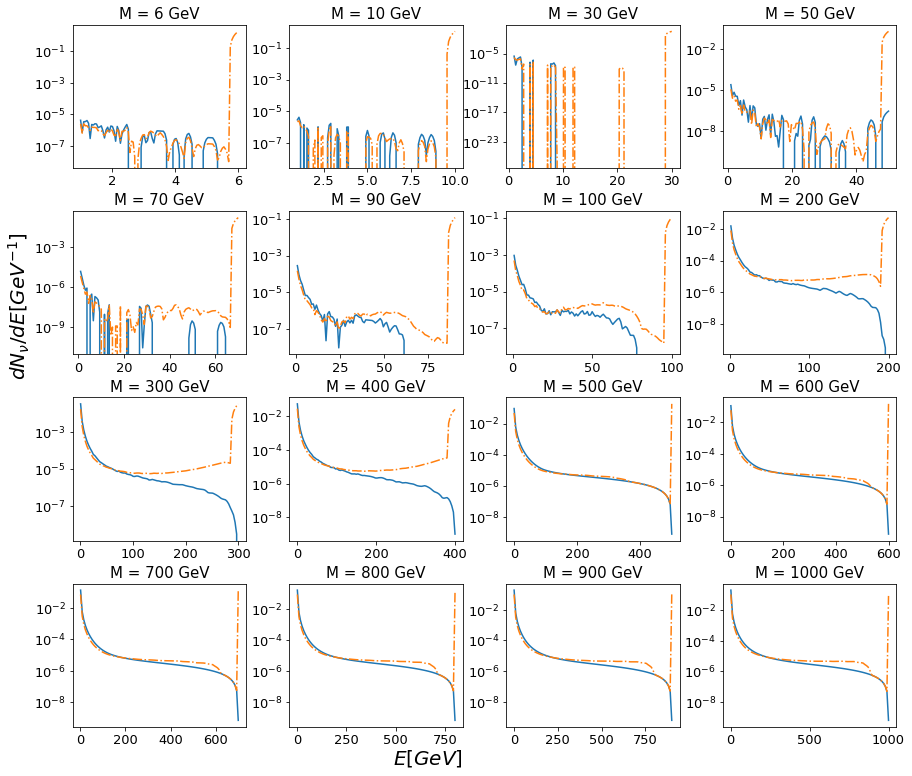

In [14]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import pickle as pkl
# Plot the precomputed spectra:
masses = [6, 10, 30, 50, 70, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.rcParams.update({'font.size': 13})
plt.rcParams['figure.figsize'] = [13, 13]
channel='nuenue'
nuflux='nu_e'
fig, axs = plt.subplots(4,4)
im = 0

# recall threshold:
#Mass of the final state particles
p_mass = {'bb':4.18,'WW':80.379,'tautau':1.776,'mumu':105e-3, "nunu":0., "nuenue":0., "numunumu":0., "nutaunutau":0.}


# open files:
flux_source = pkl.load(open("./Spectra_ann_Charon_atSource_nocut.pkl", "rb"))
flux_earth = pkl.load(open("./Spectra_ann_Charon_atEarth_nocut.pkl", "rb"))

for ix in range(0, 4):
    for iy in range(0, 4):
        if masses[im] < p_mass[channel]:
            axs[ix, iy].plot(0, 0, label='at source')
            axs[ix, iy].plot(0, 0, linestyle='-.', label='at earth')
            im+=1
            continue
        axs[ix, iy].plot(flux_source[channel][str(masses[im])]["nu_mu"]["E"], flux_source[channel][str(masses[im])]['nu_mu']["dNdE"], label='at source')
        axs[ix, iy].plot(flux_earth[channel][str(masses[im])]["nu_mu"]["E"], flux_earth[channel][str(masses[im])]['nu_mu']["dNdE"], linestyle='-.', label='at earth')

        axs[ix, iy].set_title("M = {} GeV".format(masses[im]), fontsize=15)
        axs[ix, iy].semilogy()
        im+=1

plt.subplots_adjust(left=0.12,
                    bottom=0.05, 
                    right=1., 
                    top=0.8, 
                    wspace=0.25, 
                    hspace=0.3)
fig.text(0.5, 0.01, r"$E [GeV]$", ha='center', fontsize=20)
fig.text(0.05, 0.5, r"$dN_\nu/dE [GeV^{-1}]$", va='center', rotation='vertical', fontsize=20)
# lines, labels = fig.axes[-1].get_legend_handles_labels()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
# chan_str = legends[channel]
# nu_str = labels[nuflux]
# fig.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(0.08, 0.89), title=r"{} - {} flux".format(legends[channel],labels_nutype[nuflux]), ncol=2)

# fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))


[]

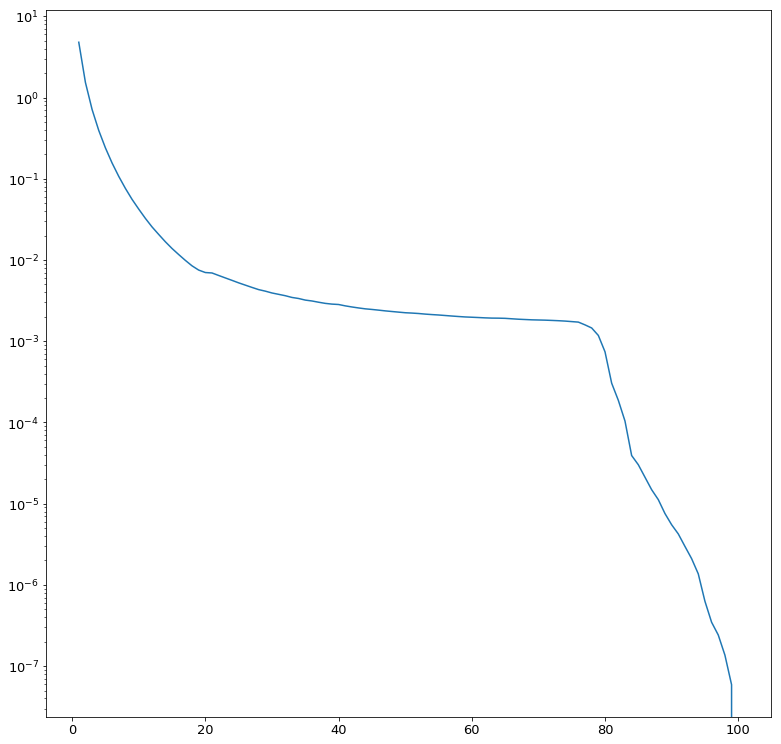

In [53]:
# 